In [1]:
import requests
import pandas as pd
import sys, json
import json
import string
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

url="https://archive.org/advancedsearch.php?q=武漢&output=json&rows=50000"

In [2]:
response = requests.get(url).json()

In [3]:
response

{'responseHeader': {'status': 0,
  'QTime': 247,
  'params': {'query': '( (title:武漢^100 OR salients:武漢^50 OR subject:武漢^25 OR description:武漢^15 OR collection:武漢^10 OR language:武漢^10 OR text:武漢^1) )',
   'qin': '武漢',
   'fields': '_default_',
   'wt': 'json',
   'rows': '50000',
   'start': 0}},
 'response': {'numFound': 312,
  'start': 0,
  'docs': [{'collection': ['podcasts'],
    'creator': 'URadio AM690',
    'date': '2020-12-16T00:00:00Z',
    'description': '節目名稱：2020/12/16 早安洛杉磯節目時段：週一至週五 07：00 - 10：00主持人：雪喬、夢佳「新聞搶先報」國會兩黨領導人表樂觀新一輪紓困法案有望達成ICU病床告急河濱、聖伯納汀諾縣啟動備用床位加州議員替餐飲業請命： 改為必要行業顧生計歐盟主席宣示團結27成員國同天開始接種疫苗中國國產雞腿包裝檢出武漢肺炎病毒麥當勞肯德基都是客戶_____________________________________洛杉磯 AM690 URadio 你的電臺 優悅你的生活?? 線上收聽Tunein：goo.gl/3gsPX6Simple Radio: goo.gl/szsDkW?? 節目訂閱Apple iTune : goo.gl/G2HG5TGoogle Play：goo.gl/mxVCag',
    'downloads': 3,
    'format': ['Archive BitTorrent',
     'Columbia Peaks',
     'Item Tile',
     'Metadata',
     'PNG',
     'Spectrogram',
     'VBR MP3'],
    'identifier

In [4]:
response['response']['docs'][1]['date']

'2020-03-06T00:00:00Z'

In [36]:
dates = [""]*9999
for count,row in enumerate(response['response']['docs']):
    try:
        dates[count]=row['publicdate']
    except:
        try:
            dates[count]=row['date']
        except:
            pass


In [37]:
dates

['2021-06-23T09:20:45Z',
 '2021-07-04T04:16:48Z',
 '2019-09-26T02:28:00Z',
 '2021-02-06T09:50:45Z',
 '2021-06-23T10:49:15Z',
 '2020-07-07T15:09:08Z',
 '2020-02-15T16:21:01Z',
 '2020-02-12T13:23:48Z',
 '2020-02-12T13:09:06Z',
 '2020-02-12T13:22:51Z',
 '2021-01-20T23:45:25Z',
 '2020-06-09T17:29:37Z',
 '2020-03-14T06:41:20Z',
 '2020-02-15T12:43:16Z',
 '2020-03-16T18:53:05Z',
 '2021-08-10T10:34:24Z',
 '2021-03-15T05:57:35Z',
 '2020-03-10T17:57:55Z',
 '2021-06-29T10:32:24Z',
 '2021-06-30T19:43:37Z',
 '2021-07-04T04:21:07Z',
 '2021-07-04T01:42:09Z',
 '2020-09-12T13:14:29Z',
 '2021-06-02T17:02:11Z',
 '2021-06-23T09:50:28Z',
 '2019-09-26T03:01:26Z',
 '2021-06-06T05:47:55Z',
 '2021-08-11T13:49:50Z',
 '2021-08-21T05:24:50Z',
 '2021-05-23T10:52:03Z',
 '2020-02-17T11:49:18Z',
 '2018-06-28T11:15:43Z',
 '2020-02-12T13:40:55Z',
 '2020-02-12T13:47:20Z',
 '2020-03-22T07:43:34Z',
 '2020-02-12T13:15:41Z',
 '2020-03-11T23:30:25Z',
 '2020-02-12T13:42:10Z',
 '2020-02-12T13:40:34Z',
 '2020-02-12T13:11:04Z',


In [38]:
dates = [x for x in dates if x]

In [39]:
dates = [x for x in dates if str(dates[0]) != "0"]

In [40]:
dates

['2021-06-23T09:20:45Z',
 '2021-07-04T04:16:48Z',
 '2019-09-26T02:28:00Z',
 '2021-02-06T09:50:45Z',
 '2021-06-23T10:49:15Z',
 '2020-07-07T15:09:08Z',
 '2020-02-15T16:21:01Z',
 '2020-02-12T13:23:48Z',
 '2020-02-12T13:09:06Z',
 '2020-02-12T13:22:51Z',
 '2021-01-20T23:45:25Z',
 '2020-06-09T17:29:37Z',
 '2020-03-14T06:41:20Z',
 '2020-02-15T12:43:16Z',
 '2020-03-16T18:53:05Z',
 '2021-08-10T10:34:24Z',
 '2021-03-15T05:57:35Z',
 '2020-03-10T17:57:55Z',
 '2021-06-29T10:32:24Z',
 '2021-06-30T19:43:37Z',
 '2021-07-04T04:21:07Z',
 '2021-07-04T01:42:09Z',
 '2020-09-12T13:14:29Z',
 '2021-06-02T17:02:11Z',
 '2021-06-23T09:50:28Z',
 '2019-09-26T03:01:26Z',
 '2021-06-06T05:47:55Z',
 '2021-08-11T13:49:50Z',
 '2021-08-21T05:24:50Z',
 '2021-05-23T10:52:03Z',
 '2020-02-17T11:49:18Z',
 '2018-06-28T11:15:43Z',
 '2020-02-12T13:40:55Z',
 '2020-02-12T13:47:20Z',
 '2020-03-22T07:43:34Z',
 '2020-02-12T13:15:41Z',
 '2020-03-11T23:30:25Z',
 '2020-02-12T13:42:10Z',
 '2020-02-12T13:40:34Z',
 '2020-02-12T13:11:04Z',


In [41]:
lastdates=len(dates)
newdates=0
while (newdates != lastdates):
    lastdates=newdates
    for i,row in enumerate(dates):    
        if dates[i][:4] < '2018':
            del dates[i]
            newdates=len(dates)

In [42]:
len(dates)

303

In [43]:
min(dates)

'2018-02-06T03:29:39Z'

In [44]:
max(dates)

'2021-09-11T09:03:35Z'

In [45]:
df = pd.DataFrame(dates)
#df = df.value_counts().sort_index()

In [46]:
df[0] = pd.to_datetime(df[0], dayfirst=True)

df1 = df[0].dt.date.value_counts().sort_index().reset_index()

df1.columns = ['DATE','Count']

In [47]:
df1['DATE'] = pd.to_datetime(df1['DATE'])

In [48]:
df1.set_index('DATE', inplace=True)

In [49]:
df1

,Count
DATE,
2018-02-06,1
2018-02-07,1
2018-02-08,1
2018-03-07,1
2018-06-28,1
...,...
2021-08-10,1
2021-08-11,1
2021-08-17,1


In [50]:
print (df1.index)

DatetimeIndex(['2018-02-06', '2018-02-07', '2018-02-08', '2018-03-07',
               '2018-06-28', '2018-09-01', '2018-09-12', '2019-04-15',
               '2019-05-20', '2019-06-07',
               ...
               '2021-07-08', '2021-07-11', '2021-07-16', '2021-07-29',
               '2021-08-09', '2021-08-10', '2021-08-11', '2021-08-17',
               '2021-08-21', '2021-09-11'],
              dtype='datetime64[ns]', name='DATE', length=145, freq=None)


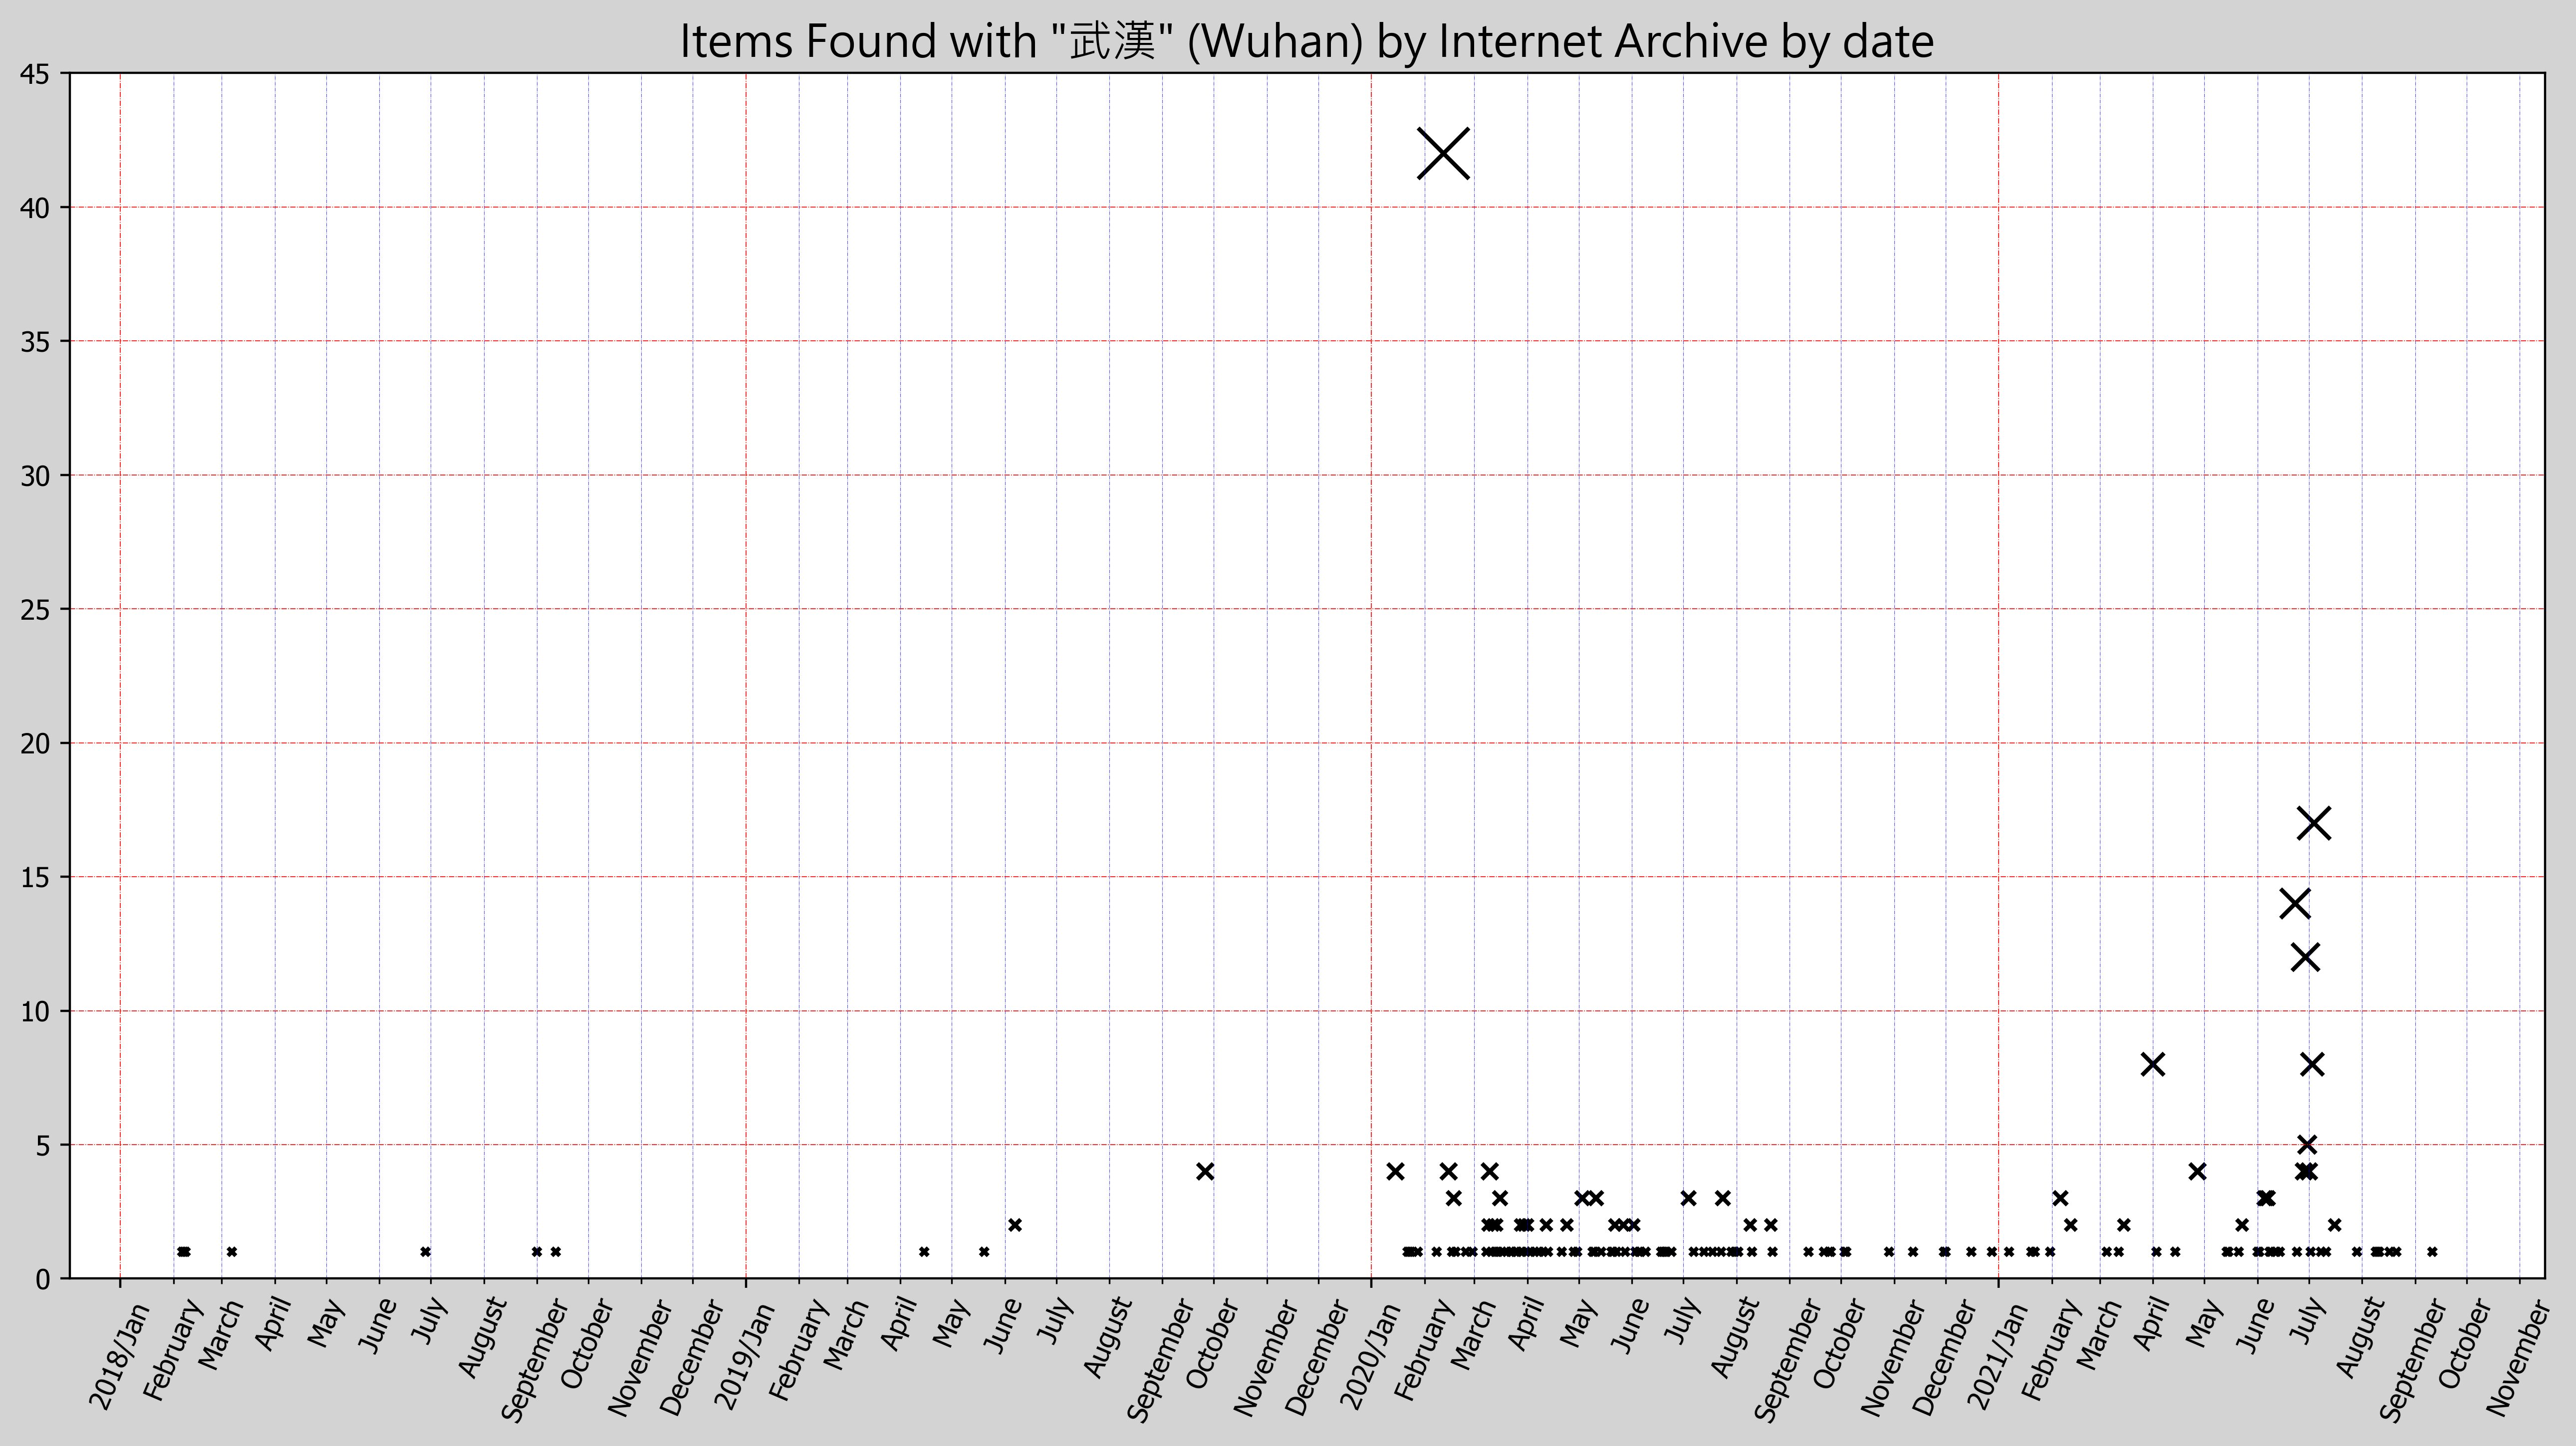

In [52]:
x = df1.index

y = df1['Count']

tfont = {'fontname':'Microsoft JhengHei'}

fig= plt.figure(figsize=(16, 8), dpi=400,facecolor='lightgray')

plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%B'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().tick_params(axis="x", which="both", rotation=67)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%b'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.scatter(x,y,s=y*8,marker='x',color='k')
plt.gca().grid(which='major', color='r', linestyle='-.', linewidth=.3, alpha=1)  
plt.gca().grid(which='minor', color='b', linestyle='-.', linewidth=.2,alpha=.7)
plt.ylim(top=45,bottom=0)
plt.title('Items Found with "武漢" (Wuhan) by Internet Archive by date',**tfont,size=16)

plt.show()
plt.close()

In [23]:
import fontconfig
fc-list :lang=zh


SyntaxError: illegal target for annotation (Temp/ipykernel_23460/771132172.py, line 2)

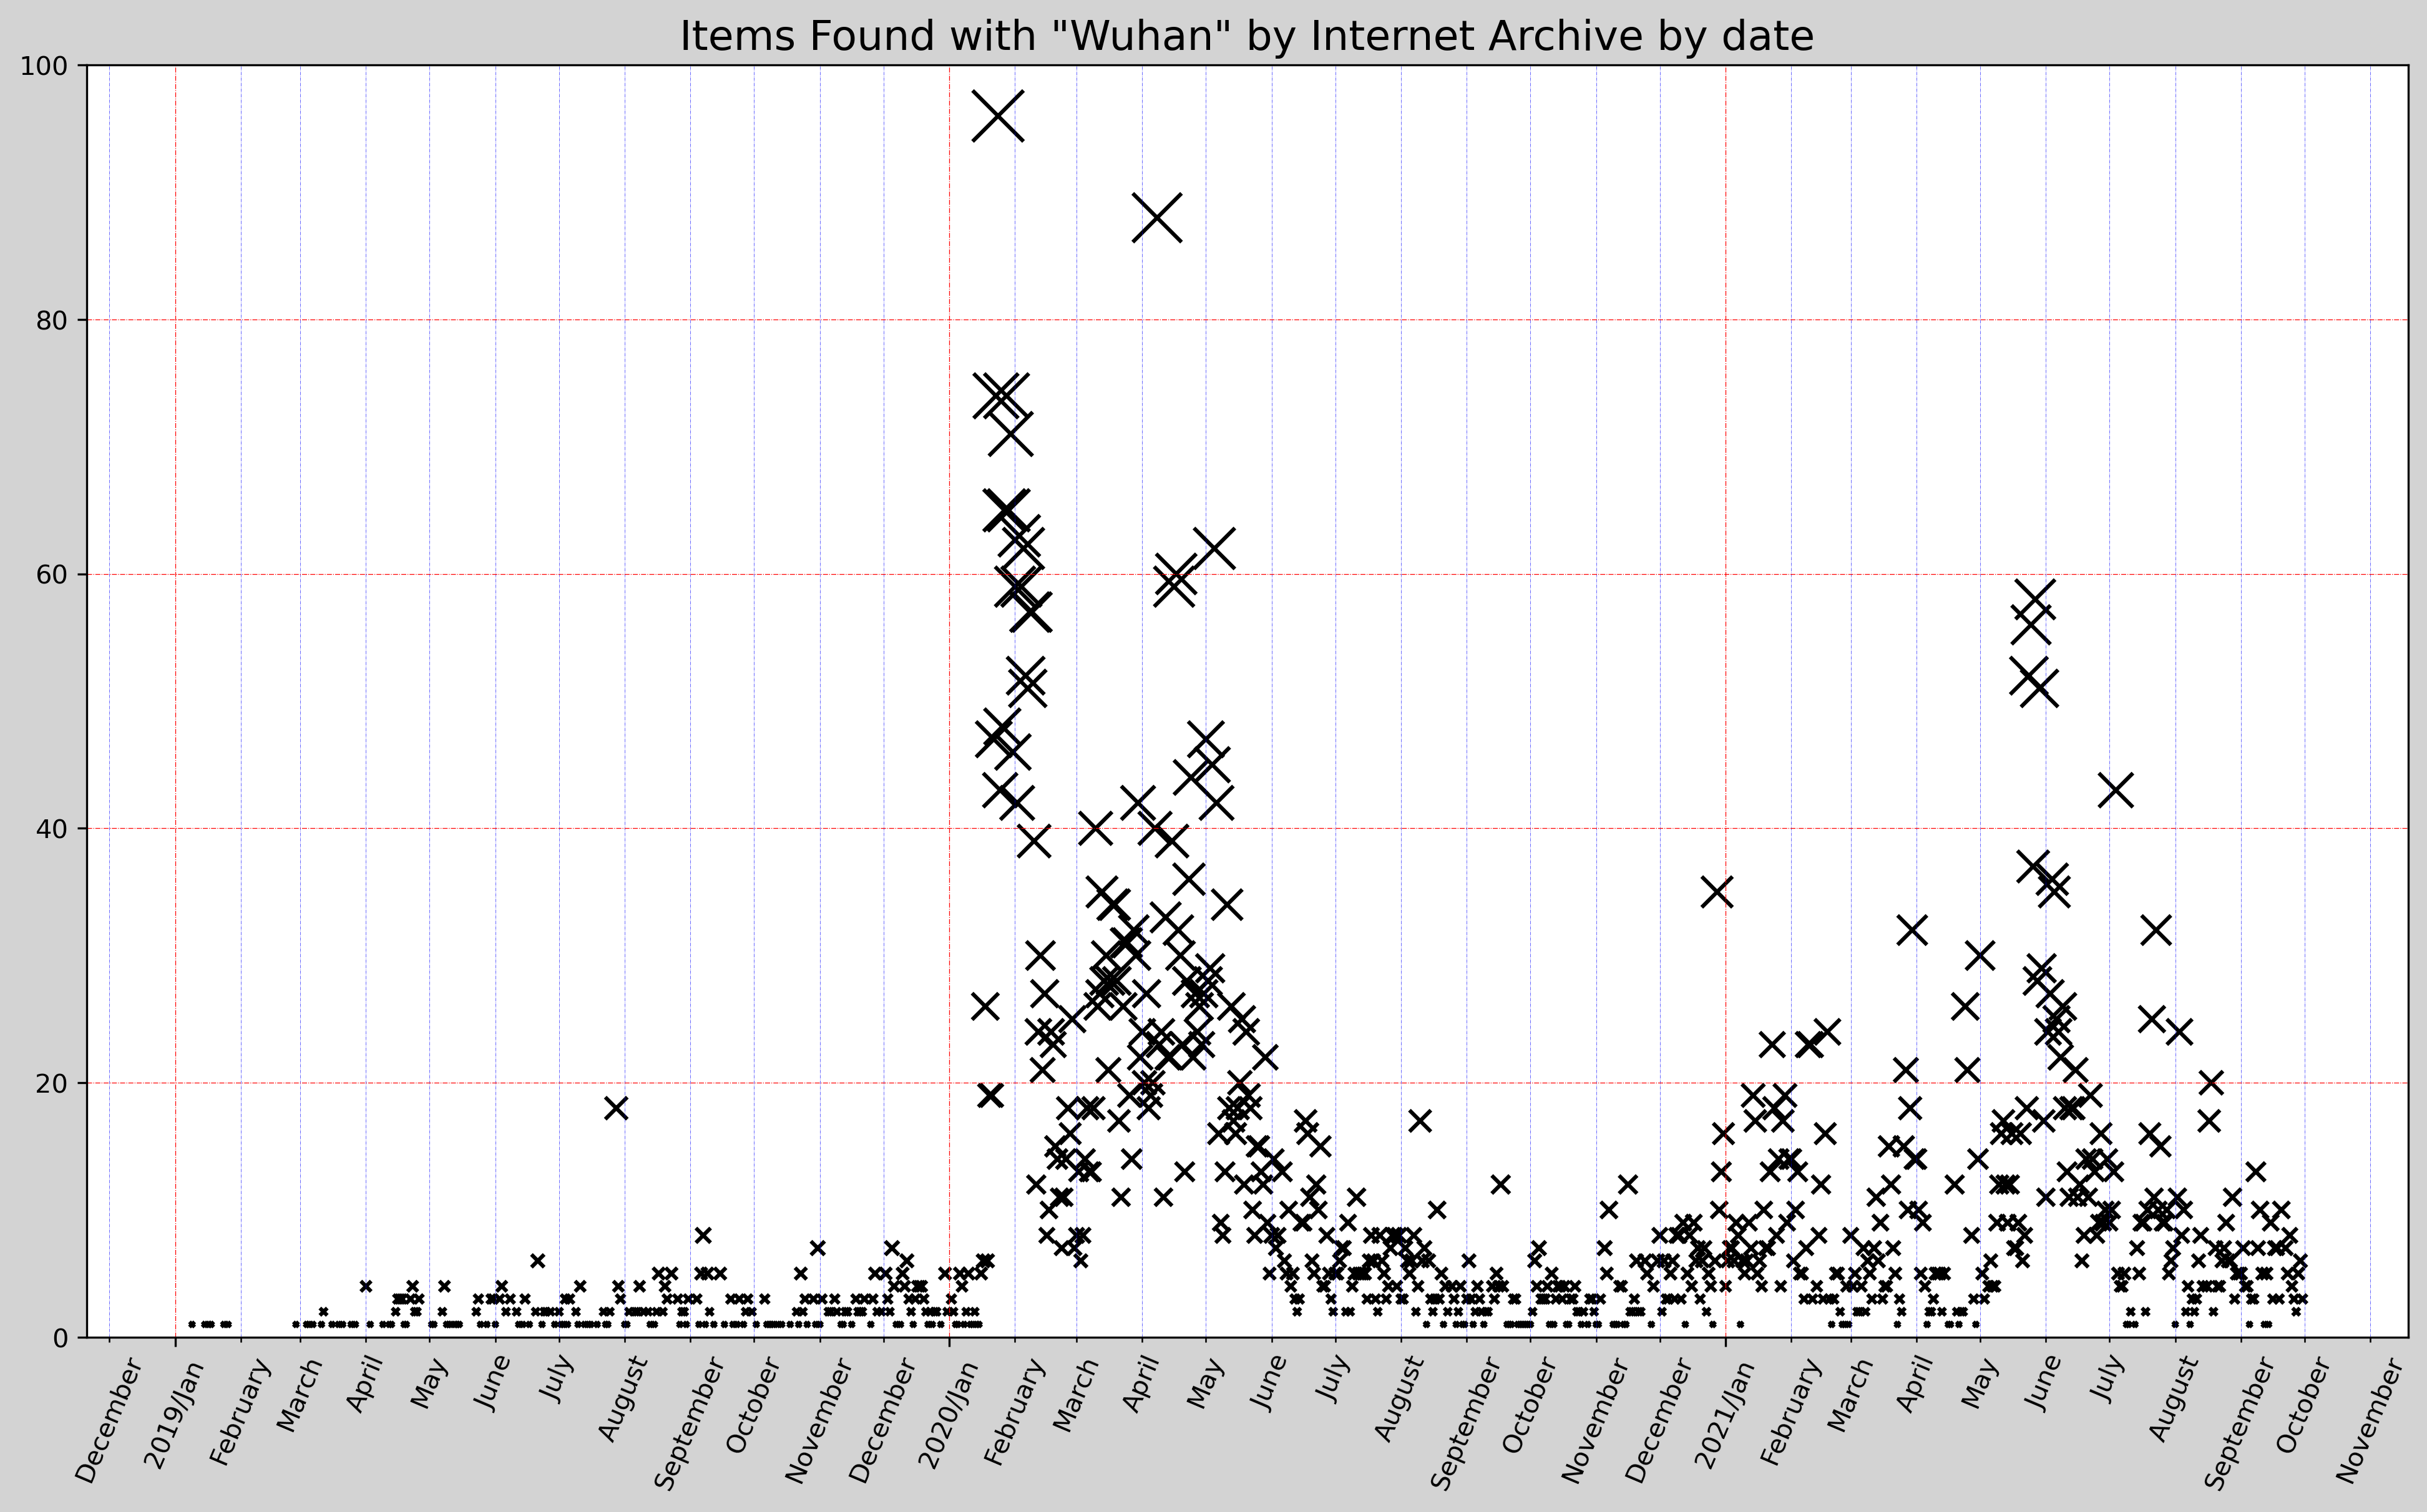

In [1108]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from celluloid import Camera

fig = plt.figure(figsize=(16, 9), dpi=300,facecolor='lightgray')
ax=  fig.gca()
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%B'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.tick_params(axis="x", which="both", rotation=67)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%b'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.grid(which='major', color='r', linestyle='-.', linewidth=.3, alpha=1)  
ax.grid(which='minor', color='b', linestyle='-.', linewidth=.2,alpha=.7)
ax.set_ylim(top=100,bottom=0)

plt.title('Items Found with "Wuhan" by Internet Archive by date',size=16)

rows = []
a = 0
camera = Camera(fig)
for i,row in df1.iterrows():
    rows=df1[:i]
    ax.scatter(rows['Count'].index,rows['Count'],s=rows['Count']*4,marker='x',color='k')
    camera.snap()

anim = camera.animate(blit=False)

anim.save('scatter.gif',fps=60)

plt.show()
plt.close()